/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 1.0418 - val_loss: 0.5645
Epoch 2/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5895 - val_loss: 0.5079
Epoch 3/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.5143 - val_loss: 0.4687
Epoch 4/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6735 - val_loss: 0.4280
Epoch 5/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4920 - val_loss: 0.3719
Epoch 6/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3311 - val_loss: 0.2790
Epoch 7/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3656 - val_loss: 0.2051
Epoch 8/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4602 - val_loss: 0.1342
Epoch 9/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4719 - val_loss: 0.0816
Epoch 10/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3096 - val_loss: 0.1439
Epoch 11/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4758 - val_loss: 0.1214
Epoch 12/42
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2990 - val_

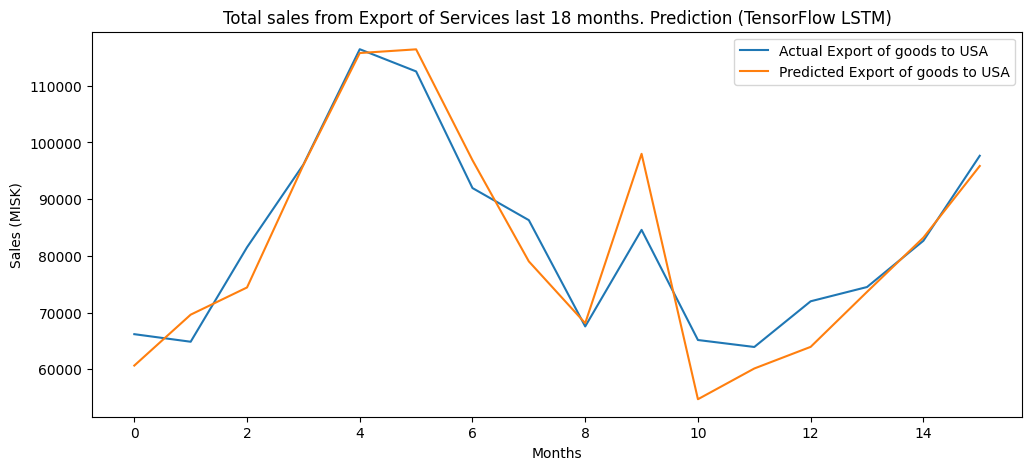

R-squared on the validation set: 0.8645
Weighted Absolute Percentage Error (WAPE): 5.5676
The LSTM model performace explains 86.4488% of the variance, with an average error (WAPE) of 5.5676%.
y_mean 61371.80999999999
y_std 24610.462439485862
len USA goods 90


In [28]:
#Simple test code for a LSTM network using two data files in two runs:
#First file:  data1.txt (90 months 2018-2025 total export of services to 250 countries in FOB/MISK)
#Second file: data2.txt.(90 months 2018-2025 total export of goods to USA in Tonnes)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# -----------Initialation and READ DATA Two different Real dataset are used:-------------------
# data1= Total sales of services MISK last 90 months,
# data3= Export of goods to USA in Tonnes last 90 months
# ---------------------------------------------------------------------------------------------
np.random.seed(42)
months = 90
t = np.arange(months)
numbers_list = []
numbers_list3 = []
lookback = 12                                      #Hyperparameters (lookback)

# -------------------------
# Sequence maker function
# -------------------------
def make_sequences(X, y, lookback=12):
    Xs, ys = [], []
    for i in range(len(X) - lookback):
        #print(i,"\t", X[i:i+lookback])             # Commented out print statement
        Xs.append(X[i:i+lookback])
        ys.append(y[i+lookback])
    return np.array(Xs), np.array(ys)

# ------------------------------------------------------
# Calculates: Weighted Absolute Percentage Error (WAPE).
# Returns: The WAPE value as a float. Returns 0 if the
# sum of actual values is zero.
# ------------------------------------------------------
def calculate_wape(y_true, y_pred):
  y_true = np.array(y_true)                         # y_true: A numpy array or list of actual values.
  y_pred = np.array(y_pred)                         # y_pred: A numpy array or list of predicted values.

  # Avoid division by zero
  if np.sum(np.abs(y_true)) == 0:
    return 0
  else:
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true)) * 100

# --------------------------------------
# Read the numbers from input data files
# --------------------------------------
def read_data():
  with open('data1.txt', 'r') as f:                 # data1.txt (export services total MISK) into a list
    for line in f:
      numbers_list.append(float(line.strip()))
  with open('data3.txt', 'r') as f:                 # data3.txt (USA export total Tonnes of goods) into a list
    for line in f:
      numbers_list3.append(float(line.strip()))
  data_array1 = np.array(numbers_list)
  data_array3 = np.array(numbers_list3)
  sales= data_array1                                # NOTE: Swithced files between data_array1 data_array3 depending on sales in MIS or Goods to USA in Tonnes
  return sales

def main():
  sales= read_data()
  features = np.stack([sales], axis=1)              # Generate feature data set & data processing
  targets = sales.reshape(-1, 1)
  y_mean = sales.mean()                             # Calculate y_mean and y_std from the UNNORMALIZED sales data
  y_std = sales.std()
  f_mean, f_std = features.mean(0), features.std(0) # Normalize data
  features_n = (features - f_mean) / f_std
  targets_n = (targets - y_mean) / y_std

  X, y = make_sequences(features_n, targets_n, lookback)
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

  # ----------------------------------------------
  # Model. Hyperparameters (LSTM, Dense)
  # ----------------------------------------------
  model = Sequential()
  model.add(LSTM(64, input_shape=(lookback, X.shape[2])))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')

  # ----------------------------------------------
  # Training. Hyperparameters (epochs, batch_size)
  # ----------------------------------------------
  history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                     epochs=42, batch_size=1, verbose=1)

  # ---------------------------
  # Plot predictions vs actual
  # ---------------------------
  y_pred = model.predict(X_val)
  y_pred = y_pred * y_std + y_mean
  y_true = y_val * y_std + y_mean
  plt.figure(figsize=(12,5))
  plt.plot(y_true, label="Actual Export of goods to USA")
  plt.plot(y_pred, label="Predicted Export of goods to USA")
  plt.title("Total sales from Export of Services last 18 months. Prediction (TensorFlow LSTM)")
  plt.xlabel("Months")
  plt.ylabel("Sales (MISK)")
  plt.legend()
  plt.show()

  # --------------------------------------------------
  # Calculate accurency: R-squared and WAPE
  # --------------------------------------------------
  r2 = r2_score(y_true, y_pred)                           # Calculate R-squared
  wape= calculate_wape(y_true, y_pred)                    # Calculate WAPE
  accurency= (100 - wape)                                 # Calculate Accurecy
  print(f"R-squared on the validation set: {r2:.4f}")
  print(f"Weighted Absolute Percentage Error (WAPE): {wape:.4f}")
  print(f'The LSTM model performace explains {r2*100:.4f}% of the variance, with an average error (WAPE) of {wape:.4f}%.')
  print("y_mean",y_mean)
  print("y_std",y_std)
  print("len USA goods",len(sales))                       # Check input features array sices
  return targets_n, y_std, y_mean, model, X_train, y_val, y_pred, targets
                                                          # make these varaibale global for the second programming cell
if __name__== "__main__":
  targets_n, y_std, y_mean, model, X_train, y_val, y_pred, targets = main()

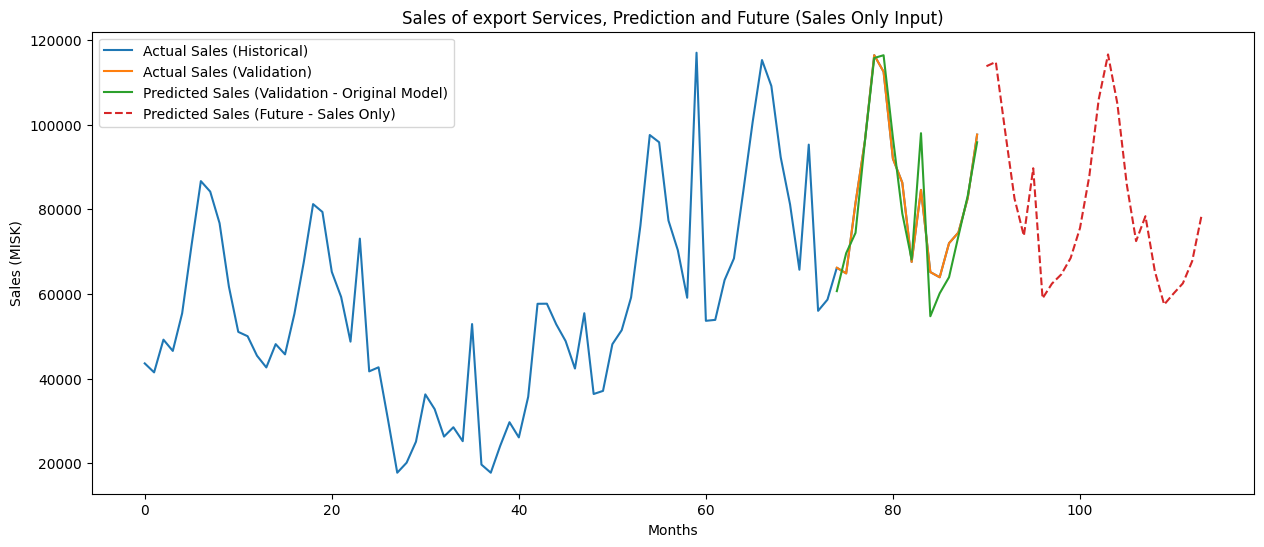

Future Export of services to 250 countries Predictions (next 24 months - Sales Only):
[113838.79210559 114844.08068727  98421.57225709  82545.92482028
  73725.63074484  89708.61843339  58948.37204701  62422.20990856
  64609.78278573  68472.37095341  75558.41548548  87870.40470372
 105954.63557927 116622.82931103 104951.34197869  85931.52070693
  72486.41229235  78372.79987408  65415.25604022  57479.92824855
  60070.79810795  62497.71535933  67771.61330364  78562.29227422]


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# Plot future predictions using only sales data
# ---------------------------------------------------
def plotting(validation_months_indices,future_months_indices_sales_only, future_predictions_sales_only, targets, y_val, y_pred, y_std, y_mean ):
  try:
    plt.figure(figsize=(15, 6))
    plt.plot(np.arange(len(targets)), targets, label="Actual Sales (Historical)")
    plt.plot(validation_months_indices, y_val * y_std + y_mean, label="Actual Sales (Validation)")
    plt.plot(validation_months_indices, y_pred, label="Predicted Sales (Validation - Original Model)")                # Using y_pred from the first cell
    plt.plot(future_months_indices_sales_only, future_predictions_sales_only, label="Predicted Sales (Future - Sales Only)", linestyle='--')
    plt.title("Sales of export Services, Prediction and Future (Sales Only Input)")
    plt.xlabel("Months")
    plt.ylabel("Sales (MISK)")
    plt.legend()
    plt.show()
  except Exception as e:
    print(f"Error in plotting: {e}")

# -------------------------------------------------------
# Predict future sales using only historical sales data
# -------------------------------------------------------
def main(targets_n, y_std, y_mean, model, X_train, y_val, y_pred, targets):                                           # Call the main function from the previous cell to get the variables
                                                                                                                      # The variables are now passed as arguments to this main function
  last_sales_sequence_n = targets_n[-lookback:]                                                                       # Get the last 'lookback' data points from the normalized historical sales data
  future_predictions_sales_only_n = []                                                                                # List to store future normalized predictions
  num_future_months = 24
  try:                                                                                                                # Number of months to predict into the future
    current_sales_sequence_n = last_sales_sequence_n.copy()                                                           # Initialize the current sequence for prediction
    for i in range(num_future_months):                                                                                # Reshape the current sequence to match the model's input shape (1, lookback, num_features)
      input_sequence = current_sales_sequence_n.reshape(1, lookback, 1)                                               # Since we only have one feature (sales or goods), the shape is (1, lookback, 1)
      next_sales_n = model.predict(input_sequence, verbose=0)                                                         # Predict the next sales value (normalized). verbose=0 to reduce output during prediction
      future_predictions_sales_only_n.append(next_sales_n[0, 0])                                                      # Append the predicted sales to the future predictions list
      current_sales_sequence_n = np.roll(current_sales_sequence_n, -1)                                                # Update the current sequence by removing the first value and adding the predicted value
      current_sales_sequence_n[-1] = next_sales_n[0, 0]
    future_predictions_sales_only = np.array(future_predictions_sales_only_n) * y_std + y_mean                        # Denormalize the future predictions
    last_historical_month = len(targets)                                                                              # Calculate the time indices for the future predictions
    future_months_indices_sales_only = np.arange(last_historical_month, last_historical_month + num_future_months)
    start_index_validation = lookback + len(X_train)                                                                  # Calculate the time indices for the validation data (copied from the previous cell for plotting)
    validation_months_indices = np.arange(start_index_validation, start_index_validation + len(y_val))
  except Exception as e:
    print(f"Error in predicting future sales using only historical sales data: {e}")

  plotting(validation_months_indices,future_months_indices_sales_only,future_predictions_sales_only, targets, y_val, y_pred, y_std, y_mean )
  print("Future Export of services to 250 countries Predictions (next {} months - Sales Only):".format(num_future_months))
  print(future_predictions_sales_only)
main(targets_n, y_std, y_mean, model, X_train, y_val, y_pred, targets)                                                # Call the main function from the previous cell and pass its return values to the second main function
                                                                                                                      # Assuming the first cell has been executed and its variables are in the global scope